### <center>Лабораторная работа №1<center>

1. Необходимо написать функцию, которая принимает в качестве аргуменов два числа ```x``` и ```y```, и которая возвращает:
 1. число $(x-150)(y-150)$, если $(x-50)^2+(y-50)^2 < 500$
 1. строку ```'low'```, если не выполнено условие A и  $xy<2000$
 1. строку ```'high'```, если не выполнены условия А. и B.
  
3. Необходимо написать функцию, которая принимает на вход два массива (списка) чисел, а возвращает [декартово произведение](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D1%8F%D0%BC%D0%BE%D0%B5_%D0%BF%D1%80%D0%BE%D0%B8%D0%B7%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5) данных множеств. Т.е.:
```python
a = [1, 2, 3]
b = [4, 5, 6]
c = foo(a, b)
print(c)
>>> [(1,4), (1, 5), (1, 6), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6)]
```

2. При помощи данных функций провести исследование области $x=0..100$, $y=0..100$ (с шагом 1):
 1. Разбить область $xy$ на сетку с шагом 1 при помощи функции из п.2
 2. Для каждой точки вызвать функцию из п.1
 3. Найти точку с максимальным числовым значением функции
 4. Построить график, похожий на ![](pic.png)
<center>Рис. 1. Пример графика</center>

Создание функций описанных в пунктах 1 и 2 задания.

In [1]:
def f1 (x,y):
    if (x-50)**2+(y-50)**2<500:
        a = (x-150)*(y-150)
    elif x*y < 2000:
        a = 'low'
    else:
        a = 'high'
    return a

def f2 (a,b):
    return [(i,j) for i in a for j in b]

Исследование области $x=0..100$, $y=0..100$ с шагом 1.

In [2]:
s1,s2 = [i for i in range(0,101,1)], [i for i in range(0,101,1)]
arr = f2(s1,s2)

aa = 0
for x in range (0,101,1):
    for y in range (0,101,1):
        a = f1(x,y)
        if type(a) == int:
            if aa < a:
                aa = a
                x_max = x
                y_max = y
# print(aa, 'x =',x_max, ',y =',y_max)

res, x, y = [], [[],[],[]], [[],[],[]]

for dot in arr:
    if f1(dot[0], dot[1]) != 'high' and f1(dot[0], dot[1]) != 'low':
        res.append(f1(dot[0], dot[1]))
        x[0].append(dot[0])
        y[0].append(dot[1])
    elif f1(dot[0], dot[1]) == 'high':
        x[1].append(dot[0])
        y[1].append(dot[1])
    else:
        x[2].append(dot[0])
        y[2].append(dot[1])

Построение итогового графика исследования.

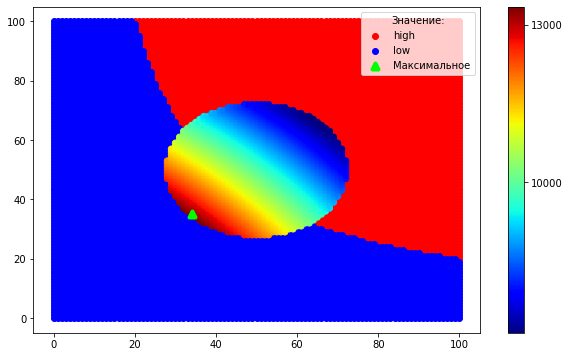

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,6))
plt.scatter(x[1], y[1], c = 'red', marker = 'o', label = 'high')
plt.scatter(x[2], y[2], c = 'blue', marker = 'o', label = 'low')
a=plt.scatter(x[0], y[0], c=res, cmap='jet')
plt.scatter(x_max, y_max, c = 'lime', marker = '^', linewidths = 4, label = 'Максимальное')
plt.legend( title="Значение:")
plt.colorbar(a, ticks=[10000, 13000]) 
plt.show()

#### <center>Вывод<center>
В данной лабораторной рвботе были созданы 2 функции, с помощью которых была исследована область $x=0..100$, $y=0..100$ с шагом 1 по определенным условиям, по результатам данного исселдования был построен график с помощью библиотеки **matplotlib**.
Точка с максимальным значением:
- координаты наденой точки: **[34.0; 35.0]**;
- значение **13340**.

Функция [декартового произведения](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D1%8F%D0%BC%D0%BE%D0%B5_%D0%BF%D1%80%D0%BE%D0%B8%D0%B7%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5) активно использовалась в курсовой рабете при решении методом сканирования.

 ### <center>Лабораторная работа №2 "Построение графиков" <center>

Лабораторная работа №2 состоит из теоретической части (с примерами) и одного задания.

Задание кратко:

В папке ```"files"``` находится файл ```data.csv```. Необходимо под данным из файла построить график, изображенный на рис. 1:

![](files/res.png)
<center>Рис. 1. Данные файла data.csv<center>

Задание подробно:

Файл ```data.csv``` имеет 4 колонки, разделенные ```;```:
**x1, x2, label, value**. 

Необходимо нанести эти данные на график и выделить цветом данные, в зависимости от значения **label**: для каждого значения **label** (кроме 0) нужен отдельный цвет (см. рис. 1).

Данные, у которых есть значение в стоблце **value** необходимо разукрасить градиентно в зависимости от значения: необходимо **создать и использовать собственную** цветовую палитру.

Необходимо обозначить элемент с минимальным значением **value**.

Весь текст на графике должен быть написан шрифтом *Times New Roman*

График должен быть сохранен в файл в формате ```.png```, иметь размер не менее ```5 х 5 дюймов``` и иметь разрешение не менее ```300 dpi```.


#### <center>Импортируем требуемые библиотеки<center>

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' #векторный формат 
import numpy as np
import csv
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import matplotlib as mpl
from matplotlib.patches import ConnectionPatch

Откроем файл ```data.csv``` и прочитаем из него все значения и их координат и опеределение среди удовлетворяющих значений минимального и его координат.

In [5]:
with open('files/data.csv', "r", newline="") as file:
    reader = csv.reader(file, delimiter=";")
    dot = list(reader)
l_0, l_1, l_2, l_3 = [[], [], [], []], [[], [], []], [[], [], []],  [[], [], []]
for i in range(2, len(dot), 2):
    if str(dot[i][2]) == '0' and dot[i][3]:
        l_0[0].append(float(dot[i][0]))
        l_0[1].append(float(dot[i][1]))
        l_0[2].append(float(dot[i][2]))
        l_0[3].append(float(dot[i][3]))
    elif str(dot[i][2]) == '1':
        l_1[0].append(float(dot[i][0]))
        l_1[1].append(float(dot[i][1]))
        l_1[2].append(float(dot[i][2]))
    elif str(dot[i][2]) == '2':
        l_2[0].append(float(dot[i][0]))
        l_2[1].append(float(dot[i][1]))
        l_2[2].append(float(dot[i][2]))
    else:
        l_3[0].append(float(dot[i][0]))
        l_3[1].append(float(dot[i][1]))
        l_3[2].append(float(dot[i][2]))

min_value = 1000
for i in range(len(l_0[3])):
    if l_0[3][i] < min_value:
        min_value, x_min, y_min = l_0[3][i], l_0[0][i], l_0[1][i]

Создвдим собственную цветовую палитру из 2 стандартных.

In [6]:
from matplotlib import cm
from matplotlib.colors import ListedColormap
n = 1000
xs = np.random.uniform(0,1, 1000)
ys = np.random.uniform(0,1, 1000)
zs = xs**2 + ys
winter_r = cm.get_cmap('BrBG_r', 256)
newcolors = winter_r(np.linspace(0, 1, 256))

newcolors[-200:-100, :] = cm.get_cmap('plasma', 100)(np.linspace(0.0, 1,100))
newcolors[-100:, :] = cm.get_cmap('BrBG_r', 100)(np.linspace(0.0, 1,100))
newcmp = ListedColormap(newcolors)

По полученным данным построим итоговый график с применением собственной цветовой политры и сохраним его в файл.

Создается сетка с определенным масштабом и количеством столбцов и строк для нанесения на нее графиков:
```python
f0 = figure(num = 0, figsize = (11, 11))
ax1 = subplot2grid((11, 11), (5, 0), colspan=12, rowspan=11)
ax2 = subplot2grid((8, 8), (0, 0), colspan=3, rowspan=3)
ax3 = subplot2grid((8, 8), (0, 4), colspan=3, rowspan=3)
```

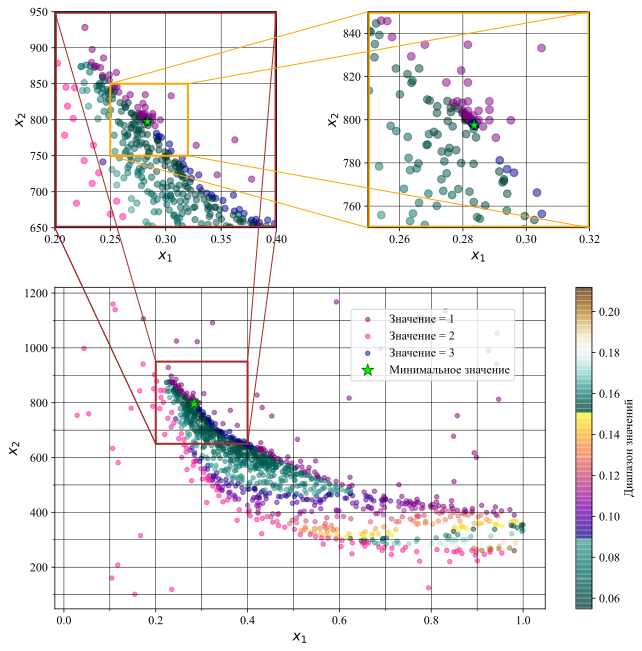

In [7]:
from matplotlib.pylab import figure, subplot2grid

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.weight'] = 'ultralight'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['font.size'] = 12
mpl.rcParams ['font.style'] = 'normal'
mpl.rcParams ['mathtext.default'] = 'regular'

f0 = figure(num = 0, figsize = (11, 11))

ax1 = subplot2grid((11, 11), (5, 0), colspan=12, rowspan=11)
plt.scatter(l_0[0], l_0[1], c = l_0[3], cmap = newcmp, alpha = 0.5, s = 20)
plt.colorbar(label="Диапазон значений")
ax1.scatter(l_1[0], l_1[1], c = 'purple', marker = 'o', label = 'Значение = 1', alpha = 0.5, s = 20)
ax1.scatter(l_2[0], l_2[1], c = 'deeppink', marker = 'o', label = 'Значение = 2', alpha = 0.5, s = 20)
ax1.scatter(l_3[0], l_3[1], c = 'darkblue', marker = 'o', label = 'Значение = 3', alpha = 0.5, s = 20)
ax1.scatter(x_min, y_min, c = 'lime', marker = '*', s = 150, label = 'Минимальное значение', edgecolor = 'g')
ax1.plot([0.2, 0.4, 0.4, 0.2, 0.2], [650, 650, 950, 950, 650], c = 'brown', linewidth = 2)
plt.legend(loc=1, bbox_to_anchor=(0.95,0.95))
plt.xlabel('$\mathit{x_{1}}$', fontsize=14)
plt.ylabel('$\mathit{x_{2}}$', fontsize=14)

ax2 = subplot2grid((8, 8), (0, 0), colspan=3, rowspan=3)
plt.xlim(0.2 , 0.4)
plt.ylim(650, 950)
plt.scatter(l_0[0], l_0[1], c = l_0[3], cmap = newcmp, alpha = 0.5, s = 40)
ax2.scatter(l_1[0], l_1[1], c = 'purple', marker = 'o', alpha = 0.5, s = 40)
ax2.scatter(l_2[0], l_2[1], c = 'deeppink', marker = 'o', alpha = 0.5, s = 40)
ax2.scatter(l_3[0], l_3[1], c = 'darkblue', marker = 'o', alpha = 0.5, s = 40)
ax2.scatter(x_min, y_min, c = 'lime', marker = '*', s = 100, edgecolor = 'g')
ax2.plot([0.25, 0.32, 0.32, 0.25, 0.25], [750, 750, 850, 850, 750], c = 'orange', linewidth = 2)
ax2.plot([0.2, 0.4, 0.4, 0.2, 0.2], [650, 650, 950, 950, 650], c = 'brown', linewidth = 4)
plt.xlabel('$\mathit{x_{1}}$', fontsize=14)
plt.ylabel('$\mathit{x_{2}}$', fontsize=14)

ax3 = subplot2grid((8, 8), (0, 4), colspan=3, rowspan=3)
plt.xlim(0.25 , 0.32)
plt.ylim(750, 850)
plt.scatter(l_0[0], l_0[1], c = l_0[3], cmap = newcmp, alpha = 0.5, s = 60)
ax3.scatter(l_1[0], l_1[1], c = 'purple', marker = 'o', alpha = 0.5, s = 60)
ax3.scatter(l_2[0], l_2[1], c = 'deeppink', marker = 'o', alpha = 0.5, s = 60)
ax3.scatter(l_3[0], l_3[1], c = 'darkblue', marker = 'o', alpha = 0.5, s = 60)
ax3.scatter(x_min, y_min, c = 'lime', marker = '*', s = 100, edgecolor = 'g')
ax3.plot([0.25, 0.32, 0.32, 0.25, 0.25], [750, 750, 850, 850, 750], c = 'orange', linewidth = 4)
plt.xlabel('$\mathit{x_{1}}$', fontsize=14)
plt.ylabel('$\mathit{x_{2}}$', fontsize=14)

ax1.grid(which="major", color="black", linewidth = 0.5)
ax1.grid(which="minor", linestyle="-", color="black", linewidth=0.5)
ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
ax1.yaxis.set_minor_locator(MultipleLocator(100))
ax2.grid(which="major", color="black", linewidth = 0.5)
ax2.grid(which="minor", linestyle="-", color="black", linewidth=0.5)
ax3.grid(which="major", color="black", linewidth = 0.5)
ax3.grid(which="minor", linestyle="-", color="black", linewidth=0.5)

con1 = ConnectionPatch(xyA=(0.2, 650), coordsA=ax1.transData, xyB=(0.2, 650), coordsB=ax2.transData, color = 'brown')
con2 = ConnectionPatch(xyA=(0.2, 950), coordsA=ax1.transData, xyB=(0.2, 950), coordsB=ax2.transData, color = 'brown')
con3 = ConnectionPatch(xyA=(0.4, 650), coordsA=ax1.transData, xyB=(0.4, 650), coordsB=ax2.transData, color = 'brown')
con4 = ConnectionPatch(xyA=(0.4, 950), coordsA=ax1.transData, xyB=(0.4, 950), coordsB=ax2.transData, color = 'brown')
con5 = ConnectionPatch(xyA=(0.25, 750), coordsA=ax2.transData, xyB=(0.25, 750), coordsB=ax3.transData, color = 'orange')
con6 = ConnectionPatch(xyA=(0.25, 850), coordsA=ax2.transData, xyB=(0.25, 850), coordsB=ax3.transData, color = 'orange')
con7 = ConnectionPatch(xyA=(0.32, 750), coordsA=ax2.transData, xyB=(0.32, 750), coordsB=ax3.transData, color = 'orange')
con8 = ConnectionPatch(xyA=(0.32, 850), coordsA=ax2.transData, xyB=(0.32, 850), coordsB=ax3.transData, color = 'orange')
f0.add_artist(con1)
f0.add_artist(con1)
f0.add_artist(con2)
f0.add_artist(con3)
f0.add_artist(con4)
f0.add_artist(con5)
f0.add_artist(con6)
f0.add_artist(con7)
f0.add_artist(con8)

plt.savefig('Лаба 2.png', dpi=300, bbox_inches='tight')
plt.show()

#### <center>Вывод<center>
По результатам работы был построен график по считанным данным с использованием созданной цветовой палитры. 
При выполнении рботы были получены навыки чтения данных из файла, а также были усовершенствованны навыки работы с библиотекой **matplotlib** в плане создания цветовых палитр и создания графиков с укрупнениями при помощи **subplot2grid**.

### <center>Лабораторная работа № 3<center>

Дана функция:

$$z(x,y)=(x+1)^2+y^2$$

Область допустимых решений функции $z(x, y)$ задается ограничениями:

$$x\le2;$$
$$y<3;$$
$$x+y\ge0.5$$
$$x^2+2y^2=2.25$$

Необходимо:
1. Найти точки минимума и максимума функции при помощи методов оптимизации модуля [```scipy.minimize```](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html) (методы определения минимума и максимума должны быть разные). В качестве начальной точки взять $z_0=(x_0, y_0)=(0.5,2)$
2. В процессе работы алгоритма оптимизации необходимо сохранять точки, в которых считаются значения функции.
3. Вывести график области допустимых решений функции и нанести на него точки, полученные в п.2. В результате должен получиться график, **похожий** на рис.1
![](Рис.1.png)
<center>Рис. 1. Пример графика</center>

#### <center>Импортируем требуемые библиотеки<center>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, Bounds, LinearConstraint, NonlinearConstraint

**1)** Создание необходимых фунций:
 - **function** - исходная фукнция, которая задает значение z;
 - **fun_obr** - функция, которая задает значение z со знаком "-";
 - **fun_jac** - функция градиента, которая задает значение dz ("-");
 - **cb_min/cb_max** - накопление предыдущего шага поиска мимимума/максимума

In [33]:
def function(a):
    return (a[0] + 1)**2 + a[1]**2

def fun_obr(a):
    return -1*((a[0] + 1)**2 + a[1]**2)

def cons_f(x): 
     return x[0]**2 + 2 * x[1]**2

def fun_jac(x):
    return -2*x[0] - 2, -2*x[1]

def cb_min(dt, dtt):
    global min_x
    global min_y
    min_x.append(dt[0])
    min_y.append(dt[1])
    
def cb_max(dt):
    global max_x
    global max_y
    max_x.append(dt[0])
    max_y.append(dt[1])

**2)** Создания массива решений и нахождение значения функций с наложенными ограничениями

In [44]:
X = np.arange(-3, 2, 0.05)
Y = np.arange(-2, 3, 0.05)
X, Y = np.meshgrid(X, Y)
Z = function(np.array([X,Y]))
z, xx, yy = [], [], []
for i in range(len(X)):
    for j in range(len(Y)):
        if X[i][j] <= 2 and Y[i][j] < 3 and (X[i][j] + Y[i][j] >= 0.5):
            xx.append(X[i][j])
            yy.append(Y[i][j])
            z.append(Z[i][j])

**3)** Описание линейных и нелинейных ограничений для метода поиска минимума/максимума, а также сталениет линейных огранечений типа $${k}{x_0} + {k}{x_1} > 0$$
**4)** Нахождения минимума/максимума исходной функции при помощи методов **trust-constr**/**SLSQP**. 

Команда **minimize** требует следующие параметры на входе: 
 - функция значений z
 - начальная точка
 - метод оптимизации
 - ограничения
 - списки для сохранения значений координат при поиске минимума или максимума
 - точность нахождения минимума
 - метод вычисления вектора градиента

In [45]:
eq_cons = {'type': 'eq',
           'fun': lambda x: np.array ([x[0]**2 + 2*x[1]**2 - 2.25]),
           'jac': lambda x: np.array ([2.0*x[0], 4.0*x[1]])
          }

bounds = Bounds ([-np.inf, -np.inf], [2, 3])
nonlinear_constraint = NonlinearConstraint(cons_f, 2.25, 2.25)
linear_constraint = LinearConstraint([[1, 0], [0, 1], [1, 1]], [-np.inf, -np.inf, 0.5], [2, 3, np.inf])
d_start = np.array([0.5, 2])
min_x, min_y, = [d_start[0]], [d_start[1]]
max_x, max_y = [d_start[0]], [d_start[1]]
res_min = minimize(function, d_start, method = 'trust-constr', callback = cb_min, options={"gtol": 1e-7, 'disp': True},
          constraints=[linear_constraint, nonlinear_constraint])
res_max = minimize(fun_obr, d_start, method = 'SLSQP', constraints = [linear_constraint, eq_cons],bounds = bounds,
                    callback = cb_max, options={"gtol": 1e-7}, jac = fun_jac)

`gtol` termination condition is satisfied.
Number of iterations: 14, function evaluations: 27, CG iterations: 8, optimality: 7.26e-13, constraint violation: 8.30e-09, execution time: 0.019 s.


<ipython-input-45-503e48f02706>:14: OptimizeWarning: Unknown solver options: gtol
  res_max = minimize(fun_obr, d_start, method = 'SLSQP', constraints = [linear_constraint, eq_cons],bounds = bounds,


**5)** Построение итогового графика с минимальным и максимальным значение и траекториями их поиска.

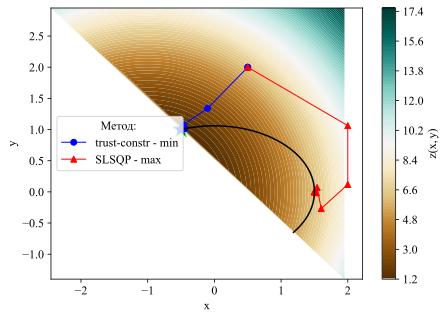

In [66]:
rc = {"font.family" : "serif", "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
plt.rcParams['font.size']=12

fig = plt.figure(figsize=[7, 5])
plt.plot(min_x, min_y, marker = 'o', c = 'b', linewidth = 1, label = 'trust-constr - min')
plt.plot(max_x, max_y, marker = '^', c = 'r', linewidth = 1, label = 'SLSQP - max')
plt.scatter(min_x[-1], min_y[-1], marker = '*', s = 300, edgecolor = 'lime', c = 'b', zorder = 1)
plt.scatter(max_x[-1], max_y[-1], marker = '*', s = 300, edgecolor = 'lime', c = 'red', zorder = 1)
t = np.linspace(0.6 * np.pi, -0.21 * np.pi, 100)
plt.plot(1.5*np.cos(t), 1.06*np.sin(t), color = 'black')
plt.tricontourf(xx, yy, z, cmap = 'BrBG', levels=100)
plt.colorbar(label = "$ z(x, y) $")
plt.xlabel("$ x $")
plt.ylabel("$ y $")
plt.legend(title = "Метод: ", loc=6)
plt.plot()
plt.show()

#### <center>Вывод<center>
В ходе работы с помощью 2 разных методов оптимизации были определены минимальное и максимальтное значения заданной функции в требуемых границах. По результатам был построен график.  
При выполнении данной лабароторной были получены навыки работы с методами оптимизации модуля [```scipy.minimize```](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html).

### <center>Лабораторная работа №4 "Интегрирование ОДУ"<center>

#### <center>Задание №1<center>

Дано уравнение 
$$\varepsilon\frac{ds}{dt}+s=0,$$     $$t\in[0,1],$$     $$s(0)=1,$$    $$\varepsilon\ll1.$$

Необходимо найти:
1. Точное решение уравнения;
2. Построить график точного решения при $\varepsilon=0.1$ и $\varepsilon=0.01$;
3. Численно решить методом Эйлера уравнение для $\varepsilon=0.01$ с шагом $\Delta t=0.02$ и шагом $\Delta t=0.002$;
4. Построить графики для численных решений.

#### <center>Преобразование заданного уравнения<center>
$$\varepsilon\frac{ds}{dt}+s=0$$

$$\varepsilon\frac{ds}{s}=-dt$$

$$\varepsilon\cdot\ln s=-t + c$$

$$s(0)=1 => c = 0$$ 

$$s=e^{-t/s}$$

#### <center>Импортируем требуемые библиотеки<center>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.integrate import ode, odeint
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 

**1)** Cоздание функции точного решения и построение графика точного решения при $\varepsilon=0.1$ и $\varepsilon=0.01$.

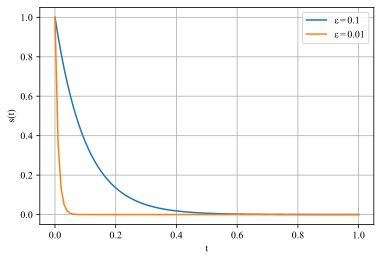

In [14]:
def resh(t, eps):
    return np.exp(-1*t / eps)

t = np.linspace(0, 1, 100)
eps_1, eps_2 = 0.1, 0.01
s_1, s_2, tt = [], [], []

for i in t:
    s_1.append(resh(i,eps_1))
    s_2.append(resh(i,eps_2))
    tt.append(i)
    
plt.plot(tt, s_1, label='$\epsilon=0.1$')
plt.plot(tt, s_2, label='$\epsilon=0.01$')
plt.xlabel('$t$')
plt.ylabel('$s(t)$')
plt.grid()
plt.legend()
plt.show()

**2)** Численно решить методом Эйлера уравнение для $\varepsilon=0.01$ с шагом $\Delta t=0.02$ и шагом $\Delta t=0.002$;

In [15]:
def eiler(eps, n, t):
    tt, s = [], []
    si = 1
    dt = (t[0] + t[-1])/n
    for i in t:
        tt.append(i)
        s.append(si)
        si += dt*-1*s[-1]/eps
    return s, tt
  
eps = 0.01
n =201 # при dt=0.02, тоесть n=51 получается гребенка
t = np.linspace(0, 1, n)
y_1, x_1 = eiler(eps, n, t)
n = 501
t = np.linspace(0, 1, n)
y_2, x_2 = eiler(eps, n, t)

**3)** Построение графика для численных решений

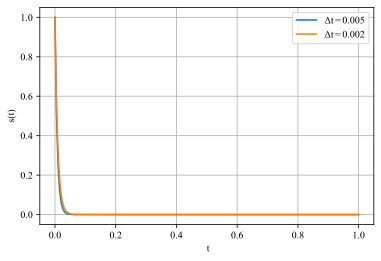

In [27]:
plt.plot(x_1, y_1, label='$\Delta t=0.005$')
plt.plot(x_2, y_2, label='$\Delta t=0.002$')
plt.grid()
plt.xlabel('$\ t$')
plt.ylabel('$s(t)$')
plt.legend(loc = 0)
plt.show()

#### <center>Задание №2<center>
1. Разобраться с примером (данным ниже) динамики материальной точки в поле силы тяжести и с сопротивлением при движении (брошенный мяч). Система интегрируется методом Эйлера.
2. Изменить и дополнить пример наличием силы тяги (с произвольным профилем, задается студентом).
4. Решить систему ОДУ при помощи модуля scipy.integrate.ode (см. [официальную справку](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html) ). Изучить метод интегрирования, который реализован в библиотеке. В качестве момента остановки интегрирования взять момент "пдаения" мяча на "землю".
5. Построить график получившийся траектории.
6. Построить профиль тяги (от времени).

#### <center>Исходные данные<center>
В качестве прототипа примем реактивный снаряд от РСЗО БМ-21 "Град".
    
Величина | Значение |
------|:--------:|
$x_{0}, м$| 0     |
$y_{0}, м$| 0    |
$v_{0}, м/с$| 0  |
$	\theta_{0}  $| 45  |
$ m, кг$    | 66  |
$P, Н   $ | 15000|
$	\rho_{0} , кг/м^{3}$|   1,240|
$	a , м/с$|   331|

**1)** Инициализация вектора начальных данных и функции лобового сопротивления.

In [40]:
grad = pi/180 
g = 9.81
ro = 1.240 
a = 331

def C_x(M):
    return 0.44

x_0 = 0 
y_0 = 0
V_0 = 10
teta_0 = 45
mass = 66
S_m = pi*0.122**2/4
Y_0 = np.array([x_0, y_0, V_0*cos(teta_0*grad), V_0*sin(teta_0*grad)])

**2)** Создание функций тяги, системы уравнений и функции Эйлера.

In [41]:
def tyga(Y):
    x = Y[0]
    y = Y[1]
    V_x = Y[2]
    V_y = Y[3]
    if sqrt(x**2 + y**2) < 2000:
        return 1.5e4
    else:
        return 0
    
def sistema(t,Y):
    x = Y[0]
    y = Y[1]
    V_x = Y[2]
    V_y = Y[3]
    teta = atan(V_y/V_x)
    V = sqrt(V_x**2 + V_y**2)
    mach = V/a
    F_cx = ro*V**2/2*S_m*C_x(mach)
    mg = mass*g
    a_x = (copysign(F_cx*cos(teta),-V_x) + tyga(Y)*sin(teta))/mass
    a_y = (copysign(F_cx*sin(teta),-V_y) - mg + tyga(Y)*sin(teta))/mass
    return np.array([V_x, V_y, a_x, a_y])

def eiler(t_0, t_1, y_0, dYdt, n_points):
    ts, dt = np.linspace(t_0,t_1,n_points, retstep=True)
    ans = []
    ans.append(y_0)
    Y_i = y_0
    for ti in ts[:-1]:
        Y_ip1 = Y_i + dt*dYdt(ti,Y_i)
        ans.append(Y_ip1)
        Y_i = Y_ip1
    return np.array(ans), ts

**3)** Решение систему ОДУ при помощи модуля scipy.integrate.ode 

In [42]:
y,t = eiler(0,10,Y_0,sistema,100)
t_0, dt = 0, 0.05
xx, yy = [], []
C = ode(sistema).set_integrator('zvode', method='bdf', nsteps=1000).set_initial_value(Y_0, t_0)
C.integrate(C.t + dt)
C.y.real
while C.successful() and C.y[1] > 0 :
    xx.append(C.y[0].real)
    yy.append(C.y[1].real)
    C.integrate(C.t+dt)
    
p = []
for i in y:
    p.append(tyga(i))

<ipython-input-41-cd27274f816f>:16: ComplexWarning: Casting complex values to real discards the imaginary part
  teta = atan(V_y/V_x)
<ipython-input-41-cd27274f816f>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  V = sqrt(V_x**2 + V_y**2)
<ipython-input-41-cd27274f816f>:21: ComplexWarning: Casting complex values to real discards the imaginary part
  a_x = (copysign(F_cx*cos(teta),-V_x) + tyga(Y)*sin(teta))/mass
<ipython-input-41-cd27274f816f>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  if sqrt(x**2 + y**2) < 2000:
<ipython-input-41-cd27274f816f>:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a_y = (copysign(F_cx*sin(teta),-V_y) - mg + tyga(Y)*sin(teta))/mass


**4)** Построение траектори полёта ракеты.

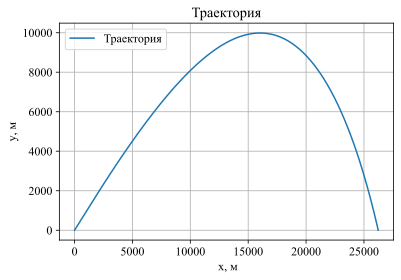

In [43]:
plt.plot(xx, yy, label='Траектория')
plt.xlabel("$\ x $, м")
plt.ylabel('$y$, м')
plt.legend(loc=2)
plt.title('Траектория')
plt.grid()
plt.show()

**5)** Построение профиля тяги.

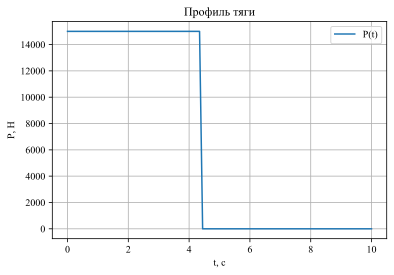

In [21]:
plt.plot(t, p, label='$P(t)$')
plt.xlabel('$t$, c')
plt.ylabel('$P$, Н')
plt.legend(loc='best')
plt.title('Профиль тяги')
plt.grid()
plt.show()

### <center>Вывод </center>
В ходе выолнения лабораторной работы были освоены методы модуля [```scipy.integrate.ode```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html) для решения ДУ, а также получены навыки по решению дифференциальных уравнений по методу Эйлера. 
Результатом выполнения лабораторной работы является:
- численно решение ДУ;
- решение задачи траекторного анализа численным методом;
- построение траектории и профиля тяги ЛА.